# Does MPAA rating effect the box office?

In [1]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Read clean data
path = "Movie_Data.csv"
movies = pd.read_csv(path)
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [3]:
#Extract relevant columns
mpaa_df = movies[['Rating','Box Office']]
mpaa_df.head()

,Rating,Box Office
0,PG-13,183277573
1,PG,251476985
2,PG-13,162001186
3,PG,216900000
4,PG-13,292568851


In [4]:
#Create x value
ratings = []
for rating in mpaa_df['Rating']:
    if rating not in ratings:
        ratings.append(rating)
        
ratings

['PG-13', 'PG', 'R', 'G', 'NC-17', 'Not Rated']

In [5]:
#Create y value
df0 = mpaa_df[mpaa_df['Rating'] == ratings[0]].mean()
df1 = mpaa_df[mpaa_df['Rating'] == ratings[1]].mean()
df2 = mpaa_df[mpaa_df['Rating'] == ratings[2]].mean()
df3 = mpaa_df[mpaa_df['Rating'] == ratings[3]].mean()
df4 = mpaa_df[mpaa_df['Rating'] == ratings[4]].mean()
df5 = mpaa_df[mpaa_df['Rating'] == ratings[5]].mean()

In [6]:
average_box_office = [df0[0],df1[0],df2[0],df3[0],df4[0], df5[0]]
average_box_office = [x/1000000 for x in average_box_office]
average_box_office

[81.4896013923077,
 91.66613701587302,
 26.064236822072075,
 120.3966333076923,
 2.971782,
 0.2227295348837209]

In [7]:
# x and y values as a df
data = pd.DataFrame({"Rating":ratings,"Average Box Office (millions)":average_box_office})
data

,Rating,Average Box Office (millions)
0,PG-13,81.489601
1,PG,91.666137
2,R,26.064237
3,G,120.396633
4,NC-17,2.971782
5,Not Rated,0.222730


In [8]:
# sort data
average_box = sorted(data['Average Box Office (millions)'])

In [9]:
ratings = ratings
ratings = ['Not Rated','NC-17','R','PG-13','PG','G']
sorted_data = pd.DataFrame({"Rating":ratings,
                            "Average Box Office (millions)":average_box
})
sorted_data

,Rating,Average Box Office (millions)
0,Not Rated,0.222730
1,NC-17,2.971782
2,R,26.064237
3,PG-13,81.489601
4,PG,91.666137
5,G,120.396633


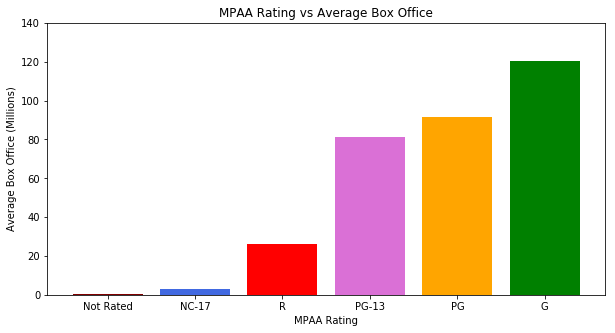

In [10]:
# bar chart showing relation
plt.figure(figsize=(10,5))
color=['maroon', 'royalblue', 'red','orchid','orange','green']
plt.bar(sorted_data['Rating'], sorted_data['Average Box Office (millions)'], color=color,align='center')
plt.ylim(0, 140)
plt.xlabel("MPAA Rating")
plt.ylabel("Average Box Office (Millions)")
plt.title("MPAA Rating vs Average Box Office")

plt.show()

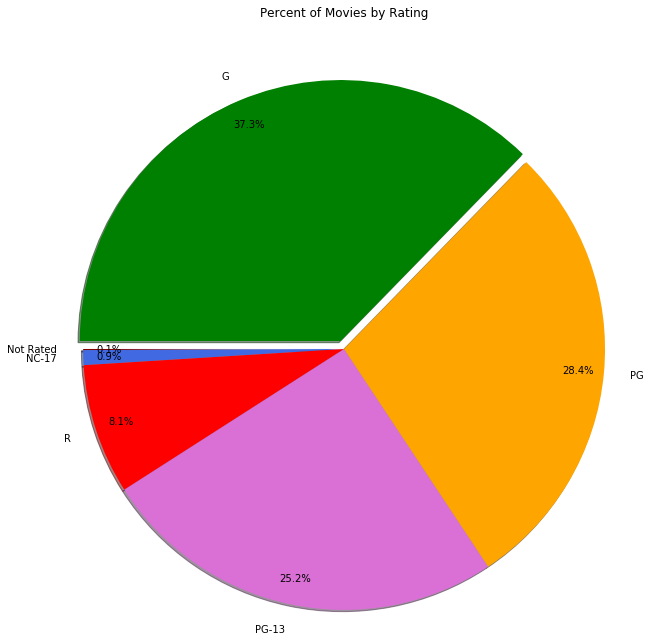

In [11]:
# pie chart showing relation
explode = [0,0,0,0,0,0.1]
colors = ['maroon', 'royalblue', 'red','orchid','orange','green']
plt.pie(sorted_data['Average Box Office (millions)'],labels=sorted_data['Rating'],colors=colors,explode=explode,autopct="%1.1f%%",shadow=True,pctdistance=0.9,radius=3,startangle=180)
plt.title("Percent of Movies by Rating",y=2)
plt.show()

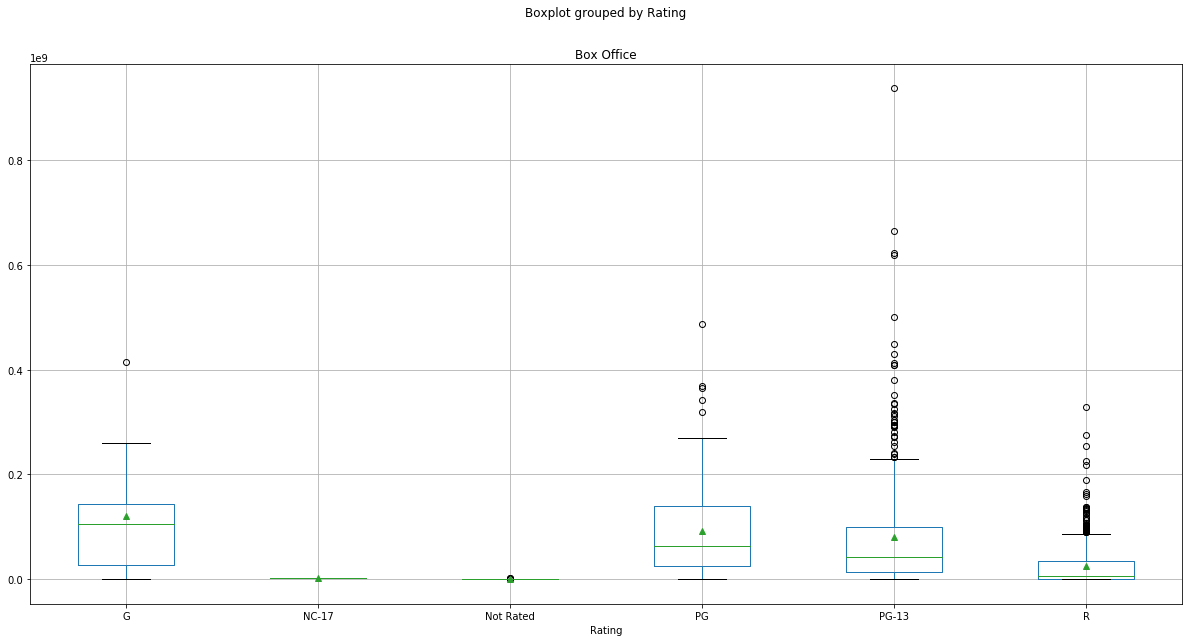

In [12]:
# Box plot
mpaa_df.boxplot("Box Office", by="Rating", figsize=(20, 10),showmeans=True)
plt.show()

In [13]:
# ANOVA test
group1 = mpaa_df[mpaa_df["Rating"] == 'Not Rated']["Box Office"]
group2 = mpaa_df[mpaa_df["Rating"] == 'NC-17']["Box Office"]
group3 = mpaa_df[mpaa_df["Rating"] == 'R']["Box Office"]
group4 = mpaa_df[mpaa_df["Rating"] == 'PG-13']["Box Office"]
group5 = mpaa_df[mpaa_df["Rating"] == 'PG']["Box Office"]
group6 = mpaa_df[mpaa_df["Rating"] == 'G']["Box Office"]

In [14]:
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=29.37724940787404, pvalue=6.545578428438524e-28)

# Observation

* Based on the data, on average, G movies bring in the most box office revenue

* It appears that PG-13 rated movies have the movies with the highest earnings. However it also must have a lot of poorly performing movies as well, bringing the average down.

* R rated movies only has 8.1% of the average revenue, likely because of a more narrow audience.

* Using the ANOVA test, the pvalue is less than 0.05. The test is significant.